In [529]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

##Importação dos Dados da NASA

In [530]:
data_hourly = pd.read_csv('dados_clima_2018_2021.csv', sep=',', on_bad_lines='skip',header=0)
data_hourly

,YEAR,MO,DY,HR,ALLSKY_KT,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DWN,SZA,T2M,PRECTOTCORR,RH2M,WS10M,WD10M
0,2018,8,1,0,-999.0,0.0,0.0,-999.0,24.53,0.00,71.69,5.25,104.84
1,2018,8,1,1,-999.0,0.0,0.0,-999.0,24.13,0.00,73.38,4.83,112.04
2,2018,8,1,2,-999.0,0.0,0.0,-999.0,23.84,0.00,74.44,4.50,119.05
3,2018,8,1,3,-999.0,0.0,0.0,-999.0,23.64,0.00,75.12,4.35,124.09
4,2018,8,1,4,-999.0,0.0,0.0,-999.0,23.49,0.00,75.56,4.35,126.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22531,2021,2,24,19,-999.0,0.0,0.0,-999.0,27.05,0.17,75.19,2.44,30.84
22532,2021,2,24,20,-999.0,0.0,0.0,-999.0,26.53,0.11,76.75,2.61,41.96
22533,2021,2,24,21,-999.0,0.0,0.0,-999.0,25.94,0.14,78.62,3.01,54.95
22534,2021,2,24,22,-999.0,0.0,0.0,-999.0,25.37,0.12,81.25,3.54,65.64


In [531]:
#Converter as colunas de tempo para o formato datetime
data_hourly.drop([0],inplace=True)
data_hourly['DATA'] = data_hourly[['DY','MO','YEAR','HR']].apply(lambda x : datetime(year=x[2],month=x[1],day=x[0],hour=x[3]), axis=1)
data_hourly.drop(['DY','MO','YEAR','HR'],axis=1,inplace=True)

data_hourly.set_index('DATA',inplace=True) #Configurar as datas como index


In [532]:
data_hourly

,ALLSKY_KT,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DWN,SZA,T2M,PRECTOTCORR,RH2M,WS10M,WD10M
DATA,,,,,,,,,
2018-08-01 01:00:00,-999.0,0.0,0.0,-999.0,24.13,0.00,73.38,4.83,112.04
2018-08-01 02:00:00,-999.0,0.0,0.0,-999.0,23.84,0.00,74.44,4.50,119.05
2018-08-01 03:00:00,-999.0,0.0,0.0,-999.0,23.64,0.00,75.12,4.35,124.09
2018-08-01 04:00:00,-999.0,0.0,0.0,-999.0,23.49,0.00,75.56,4.35,126.75
2018-08-01 05:00:00,-999.0,0.0,0.0,-999.0,23.38,0.00,76.00,4.27,127.18
...,...,...,...,...,...,...,...,...,...
2021-02-24 19:00:00,-999.0,0.0,0.0,-999.0,27.05,0.17,75.19,2.44,30.84
2021-02-24 20:00:00,-999.0,0.0,0.0,-999.0,26.53,0.11,76.75,2.61,41.96
2021-02-24 21:00:00,-999.0,0.0,0.0,-999.0,25.94,0.14,78.62,3.01,54.95


In [533]:
data_hourly = data_hourly.resample('H').sum()
data_hourly.replace(-999,0,inplace=True)

data_hourly

,ALLSKY_KT,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DWN,SZA,T2M,PRECTOTCORR,RH2M,WS10M,WD10M
DATA,,,,,,,,,
2018-08-01 01:00:00,0.0,0.0,0.0,0.0,24.13,0.00,73.38,4.83,112.04
2018-08-01 02:00:00,0.0,0.0,0.0,0.0,23.84,0.00,74.44,4.50,119.05
2018-08-01 03:00:00,0.0,0.0,0.0,0.0,23.64,0.00,75.12,4.35,124.09
2018-08-01 04:00:00,0.0,0.0,0.0,0.0,23.49,0.00,75.56,4.35,126.75
2018-08-01 05:00:00,0.0,0.0,0.0,0.0,23.38,0.00,76.00,4.27,127.18
...,...,...,...,...,...,...,...,...,...
2021-02-24 19:00:00,0.0,0.0,0.0,0.0,27.05,0.17,75.19,2.44,30.84
2021-02-24 20:00:00,0.0,0.0,0.0,0.0,26.53,0.11,76.75,2.61,41.96
2021-02-24 21:00:00,0.0,0.0,0.0,0.0,25.94,0.14,78.62,3.01,54.95


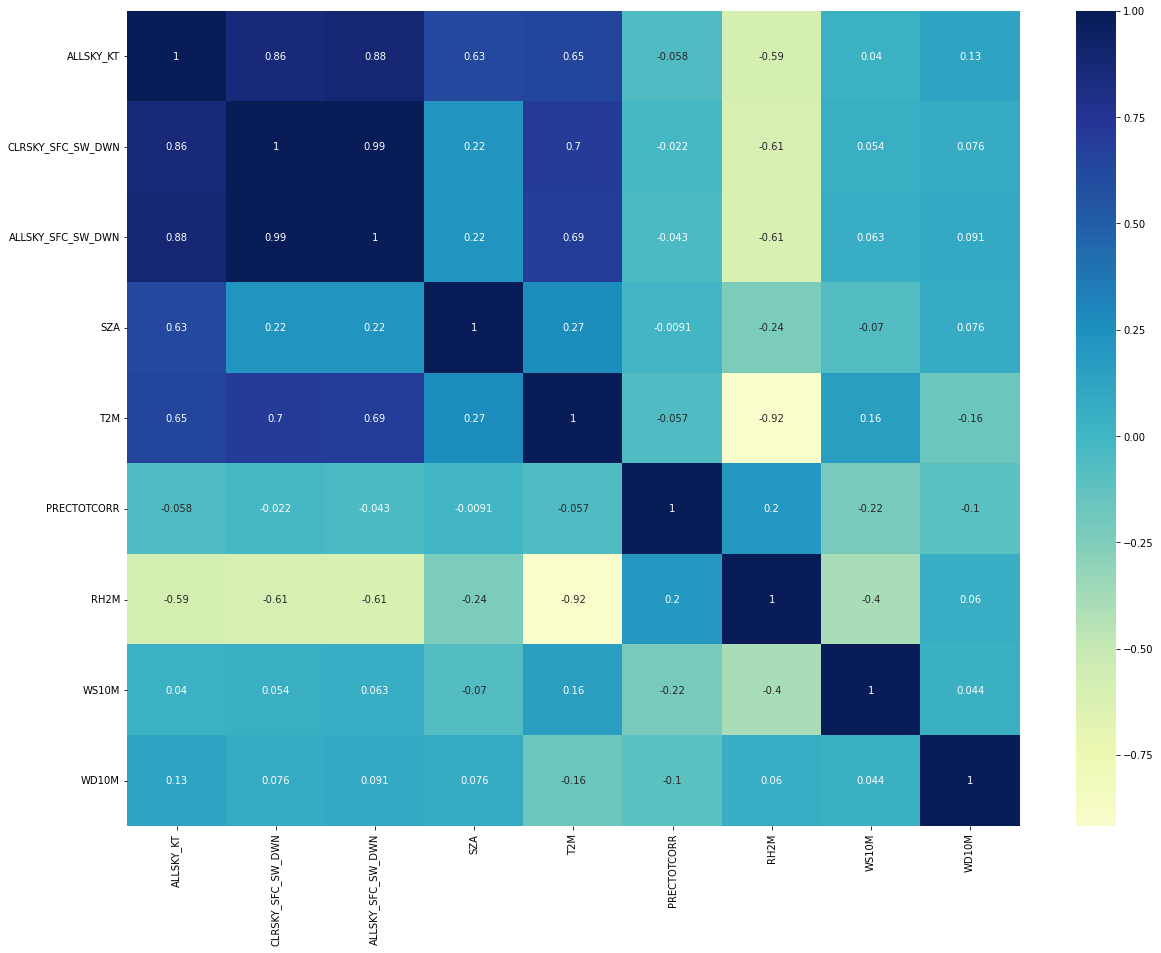

In [534]:
plt.figure(figsize=(20,15))
correlacao = data_hourly.corr()

sns.heatmap(correlacao, center=0, cmap='YlGnBu',annot=True)

In [535]:
data_hourly.rename(columns={'ALLSKY_SFC_SW_DWN':'Irradiância Global Horizontal para Qualquer Céu (kWh/m^2)',
                   'CLRSKY_SFC_SW_DWN':'Irradiância Global Horizontal a Céu Claro(kWh/m^2)',
                   'ALLSKY_KT':  'Índice de Clareza do Céu',
                   'SZA':'Ângulo do Zênite Solar (°)',
                   'T2M':'Temperatura a 2 metros (°C)',
                   'RH2M':'Umidade Relativa a 2 metros (%)',
                   'PRECTOTCORR':'Precipitação (mm)','PS':'Pressão na Superfície (kPa)',
                   'WS10M':'Velocidade do Vento a 10 metros (m/s)',
                   'WS50M':'Velocidade do Vento a 50 metros (m/s)'},inplace=True)

In [536]:
data_hourly.drop(['WD10M'],axis=1,inplace=True)

In [537]:
data_hourly.head(5)

,Índice de Clareza do Céu,Irradiância Global Horizontal a Céu Claro(kWh/m^2),Irradiância Global Horizontal para Qualquer Céu (kWh/m^2),Ângulo do Zênite Solar (°),Temperatura a 2 metros (°C),Precipitação (mm),Umidade Relativa a 2 metros (%),Velocidade do Vento a 10 metros (m/s)
DATA,,,,,,,,
2018-08-01 01:00:00,0.0,0.0,0.0,0.0,24.13,0.0,73.38,4.83
2018-08-01 02:00:00,0.0,0.0,0.0,0.0,23.84,0.0,74.44,4.50
2018-08-01 03:00:00,0.0,0.0,0.0,0.0,23.64,0.0,75.12,4.35
2018-08-01 04:00:00,0.0,0.0,0.0,0.0,23.49,0.0,75.56,4.35
2018-08-01 05:00:00,0.0,0.0,0.0,0.0,23.38,0.0,76.00,4.27


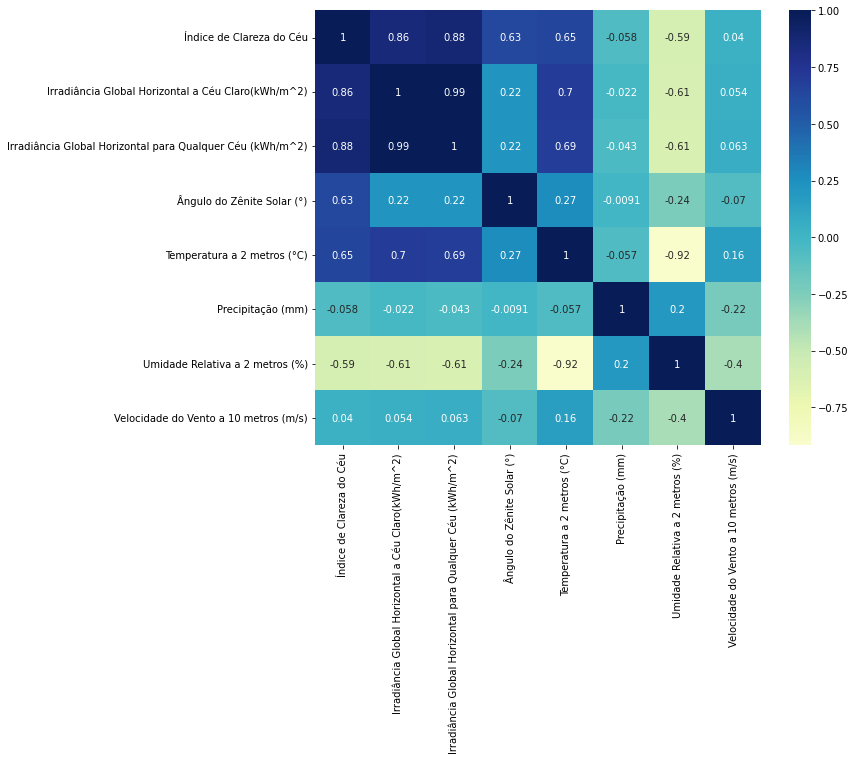

In [538]:
plt.figure(figsize=(10,8))

correlacao2 = data_hourly.corr()

sns.heatmap(correlacao2, center=0, cmap='YlGnBu',annot=True)

##Plots Diversos

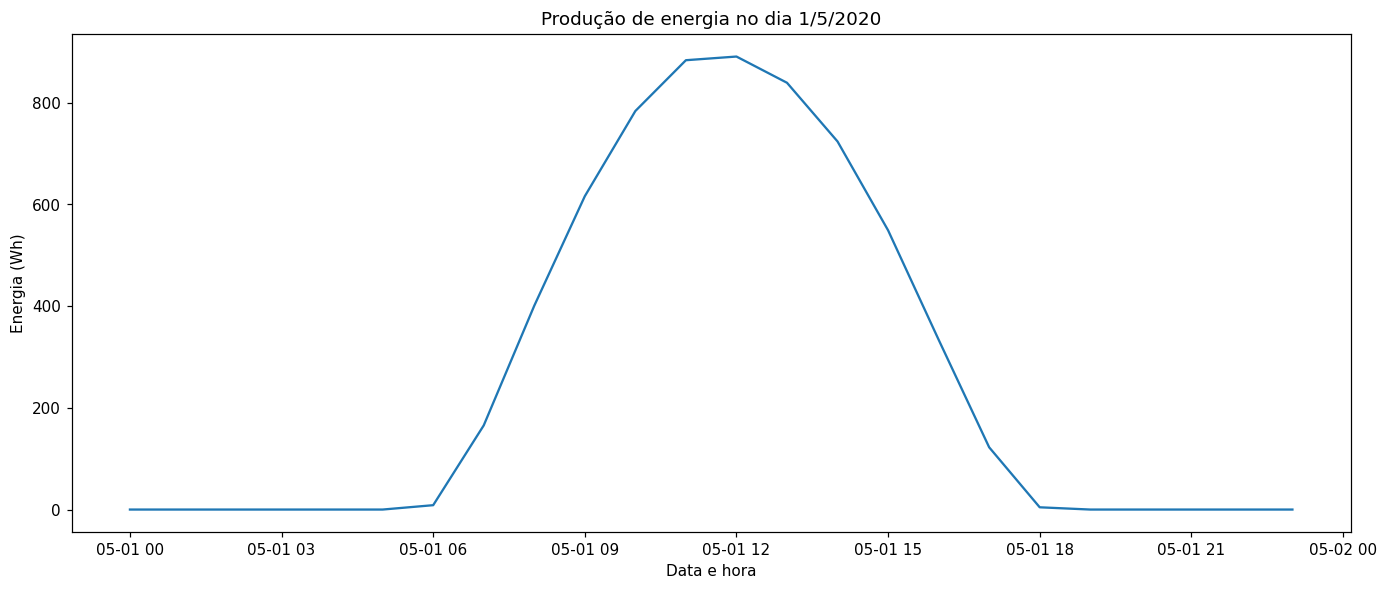

Irradiância Global Horizontal a Céu Claro(kWh/m^2)    6322.67
dtype: float64


In [539]:
dia = 1
mes = 5
ano = 2020

start = data_hourly.index.searchsorted(datetime(ano, mes, dia))
end = data_hourly.index.searchsorted(datetime(ano, mes, dia+1))
aux = data_hourly.iloc[start:end]

energia_diaria = pd.DataFrame(aux['Irradiância Global Horizontal a Céu Claro(kWh/m^2)'])

fig = plt.figure(figsize=(15,6),dpi=110)
plt.plot(energia_diaria)
plt.title('Produção de energia no dia {0}/{1}/{2}'.format(dia,mes,ano))
plt.ylabel('Energia (Wh)')
plt.xlabel('Data e hora')
plt.show()

print(energia_diaria.sum())

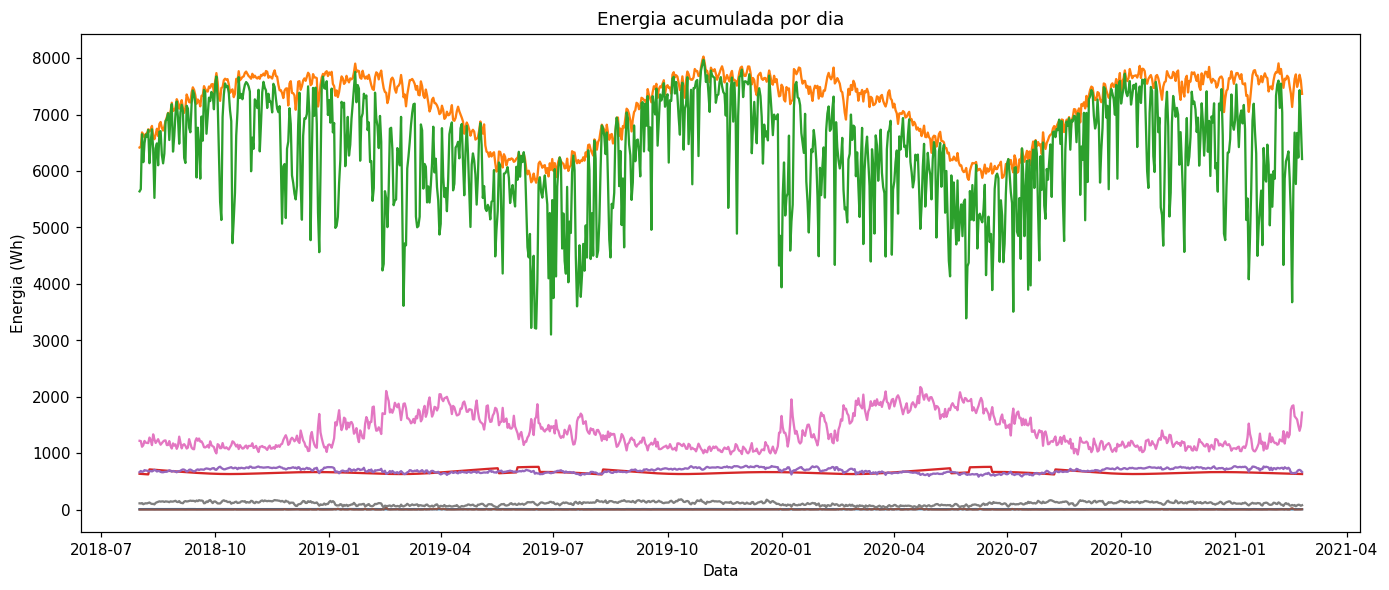

In [540]:
maxima_diaria = data_hourly.resample('D').sum()

plt.figure(figsize=(15,6),dpi=110)
plt.plot(maxima_diaria)
plt.title('Energia acumulada por dia')
plt.ylabel('Energia (Wh)')
plt.xlabel('Data')
plt.show()

##DataFrame Final dos Dados de Irradiância

In [541]:
data_hourly_final=data_hourly
data_hourly_final

,Índice de Clareza do Céu,Irradiância Global Horizontal a Céu Claro(kWh/m^2),Irradiância Global Horizontal para Qualquer Céu (kWh/m^2),Ângulo do Zênite Solar (°),Temperatura a 2 metros (°C),Precipitação (mm),Umidade Relativa a 2 metros (%),Velocidade do Vento a 10 metros (m/s)
DATA,,,,,,,,
2018-08-01 01:00:00,0.0,0.0,0.0,0.0,24.13,0.00,73.38,4.83
2018-08-01 02:00:00,0.0,0.0,0.0,0.0,23.84,0.00,74.44,4.50
2018-08-01 03:00:00,0.0,0.0,0.0,0.0,23.64,0.00,75.12,4.35
2018-08-01 04:00:00,0.0,0.0,0.0,0.0,23.49,0.00,75.56,4.35
2018-08-01 05:00:00,0.0,0.0,0.0,0.0,23.38,0.00,76.00,4.27
...,...,...,...,...,...,...,...,...
2021-02-24 19:00:00,0.0,0.0,0.0,0.0,27.05,0.17,75.19,2.44
2021-02-24 20:00:00,0.0,0.0,0.0,0.0,26.53,0.11,76.75,2.61
2021-02-24 21:00:00,0.0,0.0,0.0,0.0,25.94,0.14,78.62,3.01


##Adequação do DataFrame de Irradiância para Inclusão dos Dados de Energia




In [542]:
data_hourly_final_H = data_hourly_final.resample('H').sum()

data_hourly_final_H.reset_index(inplace=True)
data_hourly_final_H

,DATA,Índice de Clareza do Céu,Irradiância Global Horizontal a Céu Claro(kWh/m^2),Irradiância Global Horizontal para Qualquer Céu (kWh/m^2),Ângulo do Zênite Solar (°),Temperatura a 2 metros (°C),Precipitação (mm),Umidade Relativa a 2 metros (%),Velocidade do Vento a 10 metros (m/s)
0,2018-08-01 01:00:00,0.0,0.0,0.0,0.0,24.13,0.00,73.38,4.83
1,2018-08-01 02:00:00,0.0,0.0,0.0,0.0,23.84,0.00,74.44,4.50
2,2018-08-01 03:00:00,0.0,0.0,0.0,0.0,23.64,0.00,75.12,4.35
3,2018-08-01 04:00:00,0.0,0.0,0.0,0.0,23.49,0.00,75.56,4.35
4,2018-08-01 05:00:00,0.0,0.0,0.0,0.0,23.38,0.00,76.00,4.27
...,...,...,...,...,...,...,...,...,...
22530,2021-02-24 19:00:00,0.0,0.0,0.0,0.0,27.05,0.17,75.19,2.44
22531,2021-02-24 20:00:00,0.0,0.0,0.0,0.0,26.53,0.11,76.75,2.61
22532,2021-02-24 21:00:00,0.0,0.0,0.0,0.0,25.94,0.14,78.62,3.01
22533,2021-02-24 22:00:00,0.0,0.0,0.0,0.0,25.37,0.12,81.25,3.54


In [543]:
data_hourly_final_H.drop(data_hourly_final_H.index[22529:22535],axis=0,inplace=True)
data_hourly_final_H

,DATA,Índice de Clareza do Céu,Irradiância Global Horizontal a Céu Claro(kWh/m^2),Irradiância Global Horizontal para Qualquer Céu (kWh/m^2),Ângulo do Zênite Solar (°),Temperatura a 2 metros (°C),Precipitação (mm),Umidade Relativa a 2 metros (%),Velocidade do Vento a 10 metros (m/s)
0,2018-08-01 01:00:00,0.00,0.00,0.00,0.00,24.13,0.00,73.38,4.83
1,2018-08-01 02:00:00,0.00,0.00,0.00,0.00,23.84,0.00,74.44,4.50
2,2018-08-01 03:00:00,0.00,0.00,0.00,0.00,23.64,0.00,75.12,4.35
3,2018-08-01 04:00:00,0.00,0.00,0.00,0.00,23.49,0.00,75.56,4.35
4,2018-08-01 05:00:00,0.00,0.00,0.00,0.00,23.38,0.00,76.00,4.27
...,...,...,...,...,...,...,...,...,...
22524,2021-02-24 13:00:00,0.61,999.90,825.93,12.66,32.61,0.19,45.44,3.74
22525,2021-02-24 14:00:00,0.61,896.90,759.57,26.92,32.76,0.23,44.19,3.36
22526,2021-02-24 15:00:00,0.56,724.05,580.98,41.58,32.55,0.26,44.25,3.23
22527,2021-02-24 16:00:00,0.50,496.20,388.01,56.31,32.06,0.22,45.69,3.21


##DataFrame com os Dados de Energia

In [544]:
# from google.colab import files

# data_hourly_final.to_csv('dados_serra_negra.csv',sep=',')
# files.download('dados_serra_negra.csv')

In [545]:
aux = pd.read_csv('dados_FV_serra_negra.csv',sep=',')
aux.drop(['Unnamed: 0', 'TEMPO'],axis=1,inplace=True)

data_hourly_FV = data_hourly_final_H.join(aux,how='outer')
data_hourly_FV.drop(['Irradiância Global Horizontal a Céu Claro(kWh/m^2)',
            'Irradiância Global Horizontal para Qualquer Céu (kWh/m^2)'],axis=1,inplace=True)
data_hourly_FV.set_index('DATA',inplace=True)


In [546]:
data_hourly_FV

,Índice de Clareza do Céu,Ângulo do Zênite Solar (°),Temperatura a 2 metros (°C),Precipitação (mm),Umidade Relativa a 2 metros (%),Velocidade do Vento a 10 metros (m/s),Energia
DATA,,,,,,,
2018-08-01 01:00:00,0.00,0.00,24.13,0.00,73.38,4.83,0.00
2018-08-01 02:00:00,0.00,0.00,23.84,0.00,74.44,4.50,0.00
2018-08-01 03:00:00,0.00,0.00,23.64,0.00,75.12,4.35,0.00
2018-08-01 04:00:00,0.00,0.00,23.49,0.00,75.56,4.35,0.00
2018-08-01 05:00:00,0.00,0.00,23.38,0.00,76.00,4.27,0.97
...,...,...,...,...,...,...,...
2021-02-24 13:00:00,0.61,12.66,32.61,0.19,45.44,3.74,1679.89
2021-02-24 14:00:00,0.61,26.92,32.76,0.23,44.19,3.36,1104.89
2021-02-24 15:00:00,0.56,41.58,32.55,0.26,44.25,3.23,481.93


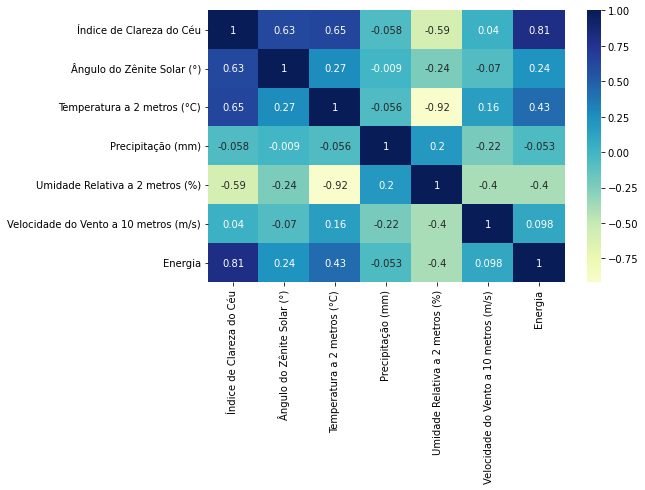

In [547]:
correlacao3 = data_hourly_FV.corr()

plt.figure(figsize=(8,5))

sns.heatmap(correlacao3, center=0, cmap='YlGnBu',annot=True)

In [548]:
data_hourly_FV.drop(['Precipitação (mm)','Velocidade do Vento a 10 metros (m/s)'],axis=1,inplace=True)

In [549]:
data_hourly_FV

,Índice de Clareza do Céu,Ângulo do Zênite Solar (°),Temperatura a 2 metros (°C),Umidade Relativa a 2 metros (%),Energia
DATA,,,,,
2018-08-01 01:00:00,0.00,0.00,24.13,73.38,0.00
2018-08-01 02:00:00,0.00,0.00,23.84,74.44,0.00
2018-08-01 03:00:00,0.00,0.00,23.64,75.12,0.00
2018-08-01 04:00:00,0.00,0.00,23.49,75.56,0.00
2018-08-01 05:00:00,0.00,0.00,23.38,76.00,0.97
...,...,...,...,...,...
2021-02-24 13:00:00,0.61,12.66,32.61,45.44,1679.89
2021-02-24 14:00:00,0.61,26.92,32.76,44.19,1104.89
2021-02-24 15:00:00,0.56,41.58,32.55,44.25,481.93


In [550]:
data_hourly_FV.drop(['Ângulo do Zênite Solar (°)'],axis=1,inplace=True)

In [551]:
aux = data_hourly_FV.iloc[:,0:-1].resample('D').mean()
aux2 = data_hourly_FV['Energia'].resample('D').sum()

dados_diarios = pd.concat([aux,aux2],axis=1)

In [552]:
dados_diarios

,Índice de Clareza do Céu,Temperatura a 2 metros (°C),Umidade Relativa a 2 metros (%),Energia
DATA,,,,
2018-08-01,0.301304,28.852174,52.981739,15031.41
2018-08-02,0.297500,28.487500,50.562083,12754.93
2018-08-03,0.338750,27.872917,46.375000,16581.87
2018-08-04,0.314167,28.124583,47.484167,15573.27
2018-08-05,0.328750,29.085000,50.660000,16056.71
...,...,...,...,...
2021-02-20,0.307083,28.108333,66.469583,14190.33
2021-02-21,0.286667,29.076250,61.997500,13645.42
2021-02-22,0.336250,29.329583,58.138333,16692.07


In [553]:
# dados_diarios['kt(k-1)'] = dados_diarios['Índice de Clareza do Céu'].shift(1)
# dados_diarios['kt(k-2)'] = dados_diarios['Índice de Clareza do Céu'].shift(2)
# dados_diarios['kt(k-3)'] = dados_diarios['Índice de Clareza do Céu'].shift(3)
# dados_diarios['kt(k-4)'] = dados_diarios['Índice de Clareza do Céu'].shift(4)
# dados_diarios['kt(k-5)'] = dados_diarios['Índice de Clareza do Céu'].shift(5)
# dados_diarios['kt(k-6)'] = dados_diarios['Índice de Clareza do Céu'].shift(6)
# dados_diarios['kt(k-7)'] = dados_diarios['Índice de Clareza do Céu'].shift(7)
# dados_diarios['kt(k-8)'] = dados_diarios['Índice de Clareza do Céu'].shift(8)
# dados_diarios['kt(k-9)'] = dados_diarios['Índice de Clareza do Céu'].shift(9)
# dados_diarios['kt(k-10)'] = dados_diarios['Índice de Clareza do Céu'].shift(10)

# dados_diarios['Temperatura(k-1)'] = dados_diarios['Temperatura a 2 metros (°C)'].shift(1)
# dados_diarios['Temperatura(k-2)'] = dados_diarios['Temperatura a 2 metros (°C)'].shift(2)
# dados_diarios['Temperatura(k-3)'] = dados_diarios['Temperatura a 2 metros (°C)'].shift(3)
# dados_diarios['Temperatura(k-4)'] = dados_diarios['Temperatura a 2 metros (°C)'].shift(4)
# dados_diarios['Temperatura(k-5)'] = dados_diarios['Temperatura a 2 metros (°C)'].shift(5)
# dados_diarios['Temperatura(k-6)'] = dados_diarios['Temperatura a 2 metros (°C)'].shift(6)
# dados_diarios['Temperatura(k-7)'] = dados_diarios['Temperatura a 2 metros (°C)'].shift(7)
# dados_diarios['Temperatura(k-8)'] = dados_diarios['Temperatura a 2 metros (°C)'].shift(8)
# dados_diarios['Temperatura(k-9)'] = dados_diarios['Temperatura a 2 metros (°C)'].shift(9)
# dados_diarios['Temperatura(k-10)'] = dados_diarios['Temperatura a 2 metros (°C)'].shift(10)

# dados_diarios['Umidade(k-1)'] = dados_diarios['Umidade Relativa a 2 metros (%)'].shift(1)
# dados_diarios['Umidade(k-2)'] = dados_diarios['Umidade Relativa a 2 metros (%)'].shift(2)
# dados_diarios['Umidade(k-3)'] = dados_diarios['Umidade Relativa a 2 metros (%)'].shift(3)
# dados_diarios['Umidade(k-4)'] = dados_diarios['Umidade Relativa a 2 metros (%)'].shift(4)
# dados_diarios['Umidade(k-5)'] = dados_diarios['Umidade Relativa a 2 metros (%)'].shift(5)
# dados_diarios['Umidade(k-6)'] = dados_diarios['Umidade Relativa a 2 metros (%)'].shift(6)
# dados_diarios['Umidade(k-7)'] = dados_diarios['Umidade Relativa a 2 metros (%)'].shift(7)
# dados_diarios['Umidade(k-8)'] = dados_diarios['Umidade Relativa a 2 metros (%)'].shift(8)
# dados_diarios['Umidade(k-9)'] = dados_diarios['Umidade Relativa a 2 metros (%)'].shift(9)
# dados_diarios['Umidade(k-10)'] = dados_diarios['Umidade Relativa a 2 metros (%)'].shift(10)

# dados_diarios['Energia(k-1)'] = dados_diarios['Energia'].shift(1)
# dados_diarios['Energia(k-2)'] = dados_diarios['Energia'].shift(2)
# dados_diarios['Energia(k-3)'] = dados_diarios['Energia'].shift(3)
# dados_diarios['Energia(k-4)'] = dados_diarios['Energia'].shift(4)
# dados_diarios['Energia(k-5)'] = dados_diarios['Energia'].shift(5)
# dados_diarios['Energia(k-6)'] = dados_diarios['Energia'].shift(6)
# dados_diarios['Energia(k-7)'] = dados_diarios['Energia'].shift(7)
# dados_diarios['Energia(k-8)'] = dados_diarios['Energia'].shift(8)
# dados_diarios['Energia(k-9)'] = dados_diarios['Energia'].shift(9)
# dados_diarios['Energia(k-10)'] = dados_diarios['Energia'].shift(10)

# dados_diarios['Energia(k+1)'] = dados_diarios['Energia'].shift(-1)
# dados_diarios['Energia(k+2)'] = dados_diarios['Energia'].shift(-2)


# dados_diarios.rename(columns={'Índice de Clareza do Céu':'kt',
#                       'Temperatura a 2 metros (°C)': 'Temperatura',
#                       'Umidade Relativa a 2 metros (%)':'Umidade'},inplace=True)


# dados_diarios.dropna(axis=0,inplace=True)

In [554]:
dados_diarios.rename(columns={'Índice de Clareza do Céu':'kt',
                      'Temperatura a 2 metros (°C)': 'Temperatura',
                      'Umidade Relativa a 2 metros (%)':'Umidade Relativa'},inplace=True)
dados_diarios

,kt,Temperatura,Umidade Relativa,Energia
DATA,,,,
2018-08-01,0.301304,28.852174,52.981739,15031.41
2018-08-02,0.297500,28.487500,50.562083,12754.93
2018-08-03,0.338750,27.872917,46.375000,16581.87
2018-08-04,0.314167,28.124583,47.484167,15573.27
2018-08-05,0.328750,29.085000,50.660000,16056.71
...,...,...,...,...
2021-02-20,0.307083,28.108333,66.469583,14190.33
2021-02-21,0.286667,29.076250,61.997500,13645.42
2021-02-22,0.336250,29.329583,58.138333,16692.07


In [556]:
def data_proc(data,n_data_before,n_data_after):

  for i in range(1,n_data_before+1):
    data['kt(k-'+str(i)+')'] = data['kt'].shift(i)
    data['Temperatura(k-'+str(i)+')'] = data['Temperatura'].shift(i)
    data['Umidade(k-'+str(i)+')'] = data['Umidade Relativa'].shift(i)
    data['Energia(k-'+str(i)+')'] = data['Energia'].shift(i)

  for k in range(1,n_data_after+1):
    data['Energia(k+'+str(k)+')'] = data['Energia'].shift(k)
        
  return data

In [557]:
n_data_before = 15
n_data_after = 4

dados_diarios_2 = data_proc(dados_diarios,n_data_before,n_data_after)

dados_diarios_2.dropna(axis=0,inplace=True)

In [559]:
from google.colab import files

dados_diarios.to_csv('BD_final_diario_'+str(n_data_before)+'DA e '+str(n_data_after)+'DDP.csv',sep=',')
files.download('BD_final_diario_'+str(n_data_before)+'DA e '+str(n_data_after)+'DDP.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>